<a href="https://colab.research.google.com/github/aquinocosme/ASTR3190-Introduction-to-Research-in-Astronomy/blob/master/cosmeNumericalIntegrationBackUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.table import Table

# 1. Numerical Integration Techniques

In [249]:
#defines default n
n = 100

## 1.1 Euler's Method:

In [250]:
def to_Euler(slope,a,b,n = n):
    """Computes the Euler's method for numerical integration of a ODEs
    Input:
        slope: (method) Mathematical function that outputs a numerical value given an input. It represents the equation that
                defines the ODE. For instance, f(x,y) = y'' = y^2+1.
        a: (int) initial value
        b: (int) final value
        n: (int) number of steps
        """
    #defines values for x and y
    x = np.zeros(n)
    y = np.zeros(n)
    #defines stepsize h
    h = (b - a)/n
    #defines first element in array
    x[0] = a
    y[0] = 0
    #goes inside array of values to populate x and specially y
    for i in range(n-1):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h*slope(x[i],y[i])
    return x,y

## 1.2 Runge-Kutta Method:

In [251]:
def RK2(slope,a,b,n = n):
    """Computes the Range-Kutta (RK2) method for numerical integration of a ODEs
    Input:
        slope: (method) Mathematical function that outputs a numerical value given an input. It represents the equation that
                defines the ODE. For instance, f(x,y) = y'' = y^2+1.
        a: (int) initial value
        b: (int) final value
        n: (int) number of steps
    """
    #defines initial arrays
    x = np.zeros(n)
    p = np.zeros(n)
    y = np.zeros(n)
    #defines the time-step
    h = (b - a)/n
    #defines initial values to iterate correctly
    x[0] = a
    y[0] = 0
    p[0] = y[0] +h*slope(x[0],y[0]) # this is the corrector to compute the average of the slopes belo
    #iterates
    for i in range(n-1):
        k1 = h*slope(x[i],y[i])
        k2 = h*slope(x[i]+h,y[i] +k1)
        x[i+1] = x[i] + h
        y[i+1] = y[i] +0.5*(k1+k2)
    return x,y

## 1.a Solve the equation $y' = y^2 +1$

In [252]:
#defines the given function
g = lambda x,y : y**2 +1
#computes the solution using both methods for the range $(-11\pi/24,11\pi/24)
x,y = to_Euler(g,0,1.56,n =n)
u,v = RK2(g,0,1.56,n = n)

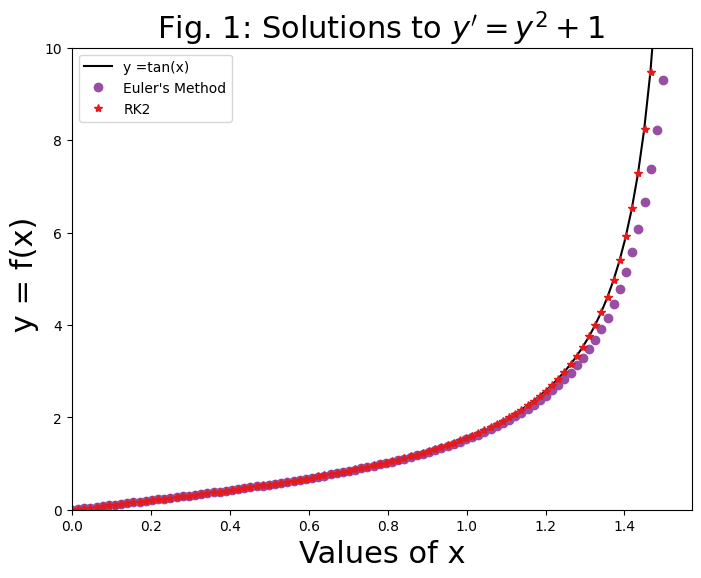

In [253]:
plt.figure(figsize = (8,6))
plt.title("Fig. 1: Solutions to $y' = y^2 +1 $ ",fontsize =22)
xprime = np.linspace(0,1.56,100)
plt.plot(xprime,np.tan(xprime),color = "black",label = "y =tan(x)")
plt.plot(x,y,"o",color = '#984ea3',label = "Euler's Method")
plt.plot(u,v,"*",color = '#e41a1c',label ="RK2")
plt.xlabel("Values of x",fontsize =22)
plt.ylabel(" y = f(x)",fontsize =22)
plt.ylim(0,10)
plt.xlim(0,np.pi/2)
plt.legend()

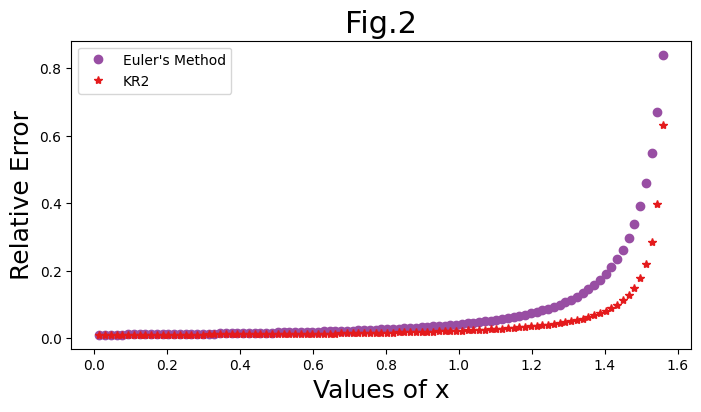

In [254]:
#computes relative error with respect to analytical solution
## redefines x to match number of steps with numerical methods n =50
xprime = np.linspace(0,1.56,n)
z = np.tan(xprime)
#we remove value that create 0/0 a.k.a: the first value
euler_err = np.abs(y[1:]-z[1:])/np.abs(z[1:])
rk2_err = np.abs(v[1:]-z[1:])/np.abs(z[1:])
#plots relative error
plt.figure(figsize = (8,4))
plt.plot(xprime[1:],euler_err,"o",color = '#984ea3',label = "Euler's Method")
plt.plot(xprime[1:],rk2_err,"*",color = '#e41a1c',label ="KR2")
plt.title("Fig.2",fontsize =22)
plt.ylabel("Relative Error",fontsize = 18)
plt.xlabel("Values of x",fontsize =18)
plt.legend()

In the figures above, I compared the Euler and Runge-Kutta (RK2) methods for $y'' = y^2 +1 $ I observe that RK2 fits better the solution for the given equation as it follows the analytical solution, whereas the Euler method breaks sooner. In addition, notice the  error percentage values for the Euler method are much higher than the RK2.


## 1.b Value of X breaks

Looking at the relative error with respect to the analytical solution, I would argue that we start seeing the approximation has an error larger than 30% at around 1.4. The error gets larger as we approach $π/2$

## 1.c Influence of stepsize h
As (n) increases, the stepsize (h) decreases. We will take advatange of this idea to study the accuracy of our final value for y = f(x)

Text(0, 0.5, 'y = f(x)')

<Figure size 1200x1000 with 0 Axes>

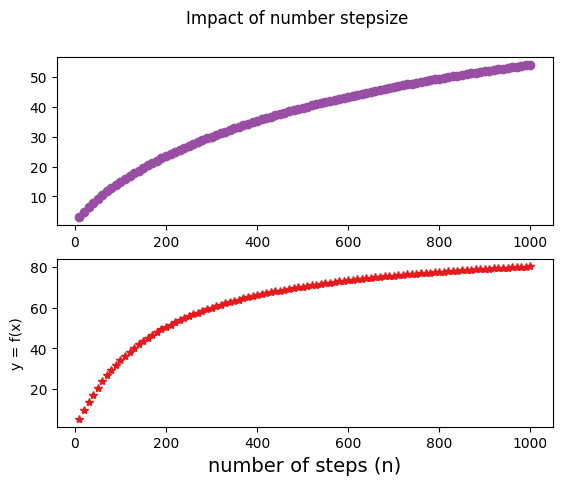

In [461]:
#creates an array of sizes
ns = np.linspace(10,1000,100)
#initialize array to put final value of y(x) with respect to sizes
y_array = np.zeros(len(ns))
v_array = np.zeros(len(ns))
#iterates my integration methods for different stepsize
for i in range(len(ns)):
  n_tmp = int(ns[i])
  tmp_x, tmp_y = to_Euler(g,0,1.56,n = n_tmp)
  tmp_u,tmp_v = RK2(g,0,1.56,n = n_tmp)
  y_array[i] = tmp_y[-1]
  v_array[i] = tmp_v[-1]
#plots
plt.figure(figsize = (12,10))
fig, ax = plt.subplots(2)
fig.suptitle('Impact of number stepsize')
ax[0].plot(ns,y_array,"o",color = '#984ea3')
ax[1].plot(ns,v_array,"*",color = '#e41a1c')
plt.xlabel("number of steps (n)",fontsize = 14)
plt.ylabel("y = f(x)")

We can see that as we decrease the stepsize (h),by increasing the number of steps, our approximation asymptotically approachers some respective values for each methods. This shows our numerical integration methods are working.

## 1.c.1 Convergence Study

In [257]:
#estimating uncertainty using last values for the y = f(x) with respect to each method
# (before last - last)/last
e_euler = np.abs((y_array[-2] - y_array[-1]))/np.abs(y_array[-1])
e_rk2 = np.abs((v_array[-2] - v_array[-1]))/np.abs(v_array[-1])
print("The relative uncertainty values for Euler and RK2 methods are given respectively by:",e_euler,e_rk2)

The relative uncertainty values for Euler and RK2 methods are given respectively by: 0.003850474361871911 0.0013951788766325163


Above we calculated the uncertainty based on our last numerical results. We observe that the error for the Range-Kutta method is smaller than Euler's approach. This matches my expectation as predicted in Fig.2.

## 1.d Order of Convergence

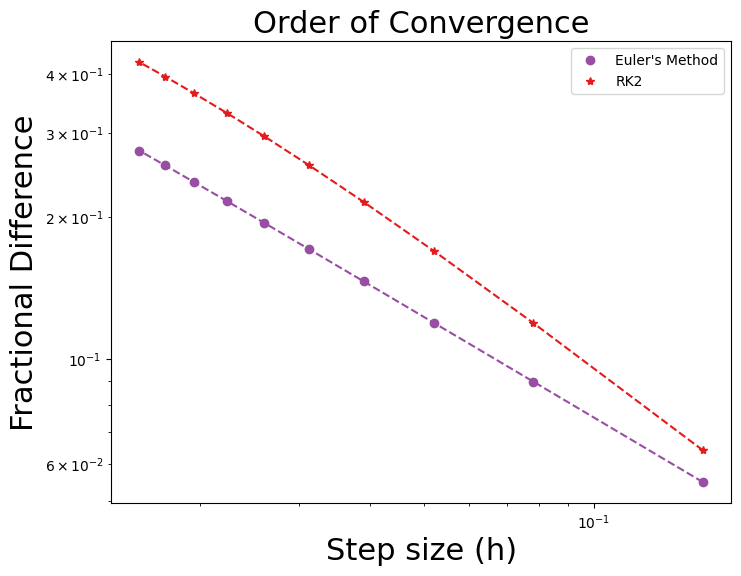

In [258]:
#define arrays to populate with fractional differences.
c = 10 #defining # data points
euler_converge = np.zeros(c)
rk2_converge = np.zeros(c)
#calculates fractional differene and populates for c values
for i in range(c):
  euler_converge[i] = y_array[i]/y_array[-1] #j_array[-1] is the highest resolution
  rk2_converge[i] =   v_array[i]/v_array[-1]
#plots order of convergence ]
b = 1.56
a = 0
plt.figure(figsize = (8,6))
plt.plot((b-a)/ns[:c],euler_converge,"o",color = '#984ea3',label="Euler's Method")
plt.plot((b-a)/ns[:c],euler_converge,"--",color = '#984ea3')
plt.plot((b-a)/ns[:c],rk2_converge,"*",color = '#e41a1c', label = "RK2")
plt.plot((b-a)/ns[:c],rk2_converge,"--",color = '#e41a1c')
plt.title("Order of Convergence",fontsize =22)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step size (h)",fontsize =22)
plt.ylabel("Fractional Difference",fontsize =22)
plt.legend()

In [259]:
rk2_slope = np.log10(rk2_converge[-1]) - np.log10(rk2_converge[0] )/((np.log10((b-a)/ns[-1])) - np.log10((b-a)/ns[0]))
euler_slope = np.log10(euler_converge[-1]) - np.log10(euler_converge[0])/((np.log10((b-a)/ns[-1])) - np.log10((b-a)/ns[0]))
print('Order of convergence for Euler and RK2:', euler_slope, rk2_slope)

Order of convergence for Euler and RK2: -1.1897915735946034 -0.9691977592551573


We see that RK2 has a steeper slope. I think this indicates a higher order of convergence but I am not entirely sure.

## 1.e Comparing convergence study with analytical solution


In [260]:
exact_euler = y_array[-1]/z[-1]
exact_rk2 = v_array[-1]/z[-1]
print("Convergence study with analytical solution:",exact_euler,exact_rk2)
c = n #defining # data points
euler_converge = np.zeros(c)
rk2_converge = np.zeros(c)
#calculates fractional differene and populates for c values
for i in range(c):
  euler_converge[i] = y_array[i]/y_array[-1] #j_array[-1] is the highest resolution
  rk2_converge[i] =   v_array[i]/v_array[-1]
print("Convergence of numerical highest resolution cases:", euler_converge[-2],rk2_converge[-2])

Convergence study with analytical solution: 0.5829677631003077 0.8674750091677579
Convergence of numerical highest resolution cases: 0.9961495256381281 0.9986048211233675


We see that RK2 is better when comparing it with the analytical solution (0.8674) than the Euler Method (0.583). This is also reflected when we calculate the fractional difference of the two most highly resolved cases (0.9986) > (0.9961). Therefore, I argue that this is a good case to show the uncertainty of a numerical solution when the analtical solution is unknow. I do think plotting the convergence of the solution is also needed to double-check these values are good.

# Applications: Maxwell-Boltzmann Distribution

In [402]:
def Maxwell_Boltzmann(v,vfake = 0,T = 10000):
    """Computes the Maxwell-Boltzmann velocity distirbution for a range of velocities for Hydrogen atoms
    Input:
          v: (ndarray) range of velocities in SI
          T: (double) temperature (K)
          vfake: (ndarray) this is just implemented for symmetry in my code with respect to other functions defines as f(x,y)

    Output:
          Fraction of particles having a given range of speeds.
    """
    k = 1.3804526*10**-23  #Boltzmann constant in SI
    m = 1.67335575*10**-27 #H mass in kg
    #computes
    first = (m/(2*np.pi*k*T))**(3/2)
    second = 4*np.pi*v**2
    expo = np.exp((-m*v**2)/(2*k*T))
    return first *second*expo

## 2.a Sanity Check

Text(0, 0.5, 'MB-Distribution')

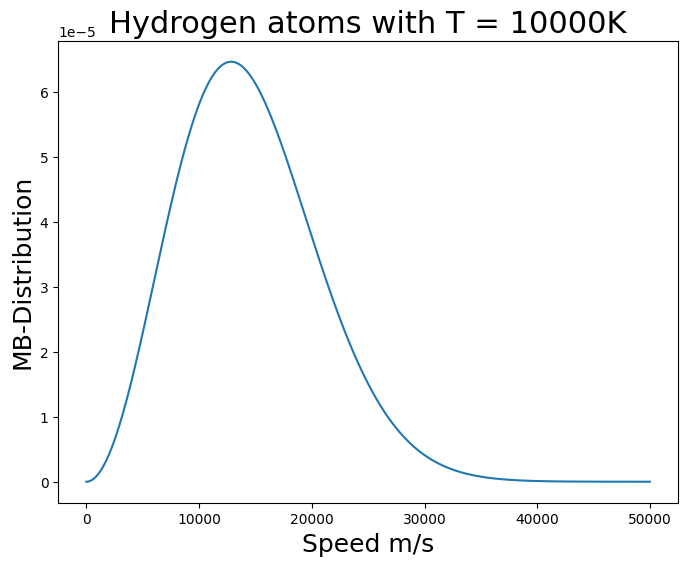

In [410]:
#defines range of velocities
vel = np.linspace(0,5*10**4,1000)
#implements MB-dsitrbution
fraction = Maxwell_Boltzmann(v =vel)
#plots
plt.figure(figsize = (8,6))
plt.plot(vel,fraction)
plt.title("Hydrogen atoms with T = 10000K",fontsize =22)
plt.xlabel("Speed m/s",fontsize = 18)
plt.ylabel("MB-Distribution", fontsize = 18)

## 2.b Fraction of H moving fast enough to excite atom fron n=1 to n=2

$E =10.2 eV $ is the energy to excite the atom from n =1 to n =2. We proceed to use the formula for Kinetic Energy $E = 1/2 mv^2$ to solve for the minimum velocity.

In [444]:
#defines intial speed:
v_min = np.sqrt(2*10.2*1.602*10**-19/(1.67355*10**-27))
#defines infinite speed:
v_max = vel[-1]
print("The minimum speed is given in m/s by: ", v_min)

The minimum speed is given in m/s by:  44190.30443643105


This is such a high minimum velocity. I was expecting values closer to the most probable value of the velocity, but I am not sure why we are getting this intial speed. I expect the percentage to be very low since the distribiution around those values tend to zero.

Text(0, 0.5, 'MB-Distribution')

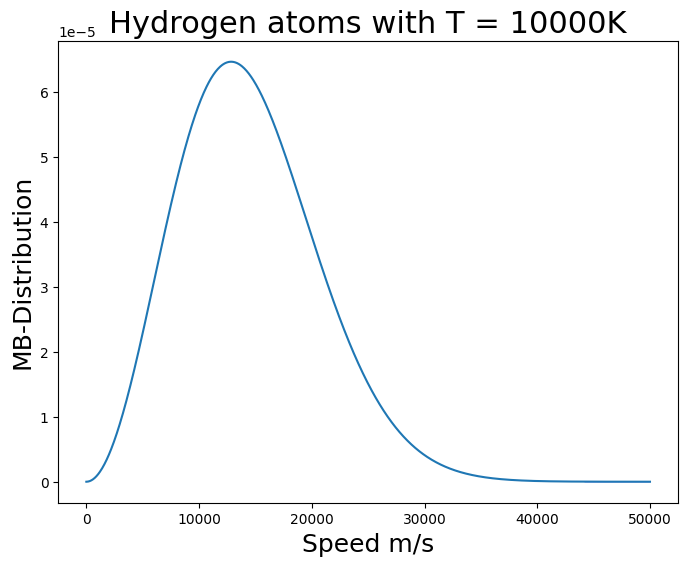

In [454]:
plt.figure(figsize = (8,6))
plt.plot(vel,fraction)
plt.fill_between(vel, fraction, where=(vel > v_min) &(vel<v_max), color='blue', alpha=.2, label="Excitation Region")
plt.title("Hydrogen atoms with T = 10000K",fontsize =22)
plt.xlabel("Speed m/s",fontsize = 18)
plt.ylabel("MB-Distribution", fontsize = 18)

In [455]:
#calculates percentage based on the shape of the distribution
def integrate_maxwell_boltzmann(v_min, v_max, n):
    v = np.linspace(v_min, v_max, n)
    dv = (v_max - v_min) / n
    integral = 0
    for i in range(n - 1):
        integral += Maxwell_Boltzmann(v[i]) * dv
    return integral
print("Percentage of atoms that get excited:",integrate_maxwell_boltzmann(v_min, v_max, n =100))

Percentage of atoms that get excited: 2.820355223554294e-05


In [456]:
n = 1000
#total integral to be used to normalize
x_euler,y_euler = to_Euler(Maxwell_Boltzmann,a =0,b=60000, n =n)
x_rk2,y_rk2 = RK2(Maxwell_Boltzmann,a =0,b = 60000,n =n)
#area of under target curve using my numerical methods
o,p = to_Euler(Maxwell_Boltzmann,a =v_min,b=v_max, n =n)
q,r = RK2(Maxwell_Boltzmann,a =v_min,b = v_max,n =n)
#ctr for area
total_euler =0
total_rk2 = 0
integral_euler = 0
integral_rk2 = 0
#stepsize
dv = (v_max -v_min)/n
#populates area for total curve and shaded region under curve
for i in range(n-1):
  integral_euler += p[i]*dv
  total_euler += y_euler[i]*dv
  integral_rk2 += r[i]*dv
  total_rk2 += y_rk2[i]*dv
#returns normalized fraction
print("Percentage of atoms that get excited according to Euler and RK2 numerical methods:",integral_rk2/total_rk2,integral_euler/total_euler)

Percentage of atoms that get excited according to Euler and RK2 numerical methods: 2.6655571028106298e-05 2.6712386841059414e-05


## Convergence test

In [458]:
converge1 = np.zeros(n)
converge2 = np.zeros(n)
for i in range(n):
  converge1[i] = p[i]/p[-1] #j_array[-1] is the highest resolution
  converge2[i] = r[i]/r[-1]
print("Convergence of numerical highest resolution cases:", converge1[-2],converge2[-2])

Convergence of numerical highest resolution cases: 0.9998544682828869 0.9998544912094572


<Figure size 1200x1000 with 0 Axes>

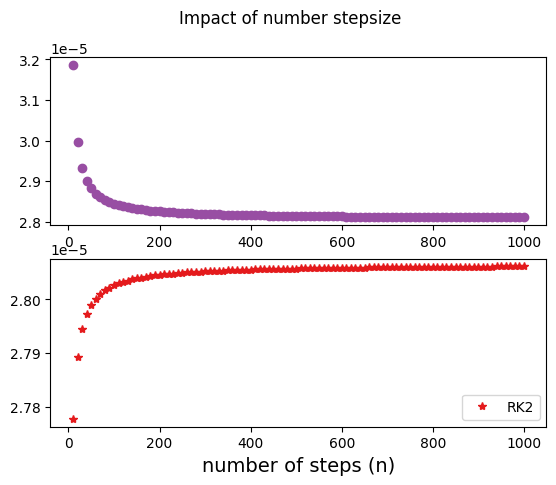

In [463]:
#creates an array of sizes
ns = np.linspace(10,1000,100)
#initialize array to put final value of y(x) with respect to sizes
y_array = np.zeros(len(ns))
v_array = np.zeros(len(ns))
#iterates my integration methods for different stepsize
for i in range(len(ns)):
  n_tmp = int(ns[i])
  tmp_x, tmp_y = to_Euler(Maxwell_Boltzmann,v_min,v_max,n = n_tmp)
  tmp_u,tmp_v = RK2(Maxwell_Boltzmann,v_min,v_max,n = n_tmp)
  y_array[i] = tmp_y[-1]
  v_array[i] = tmp_v[-1]
#plots
plt.figure(figsize = (12,10))
fig, ax = plt.subplots(2)
fig.suptitle('Impact of number stepsize')
ax[0].plot(ns,y_array,"o",color = '#984ea3',label = 'Euler')
ax[1].plot(ns,v_array,"*",color = '#e41a1c',label = "RK2")
plt.xlabel("number of steps (n)",fontsize = 14)
plt.legend()

This exercise was more challenging. I think my values for the ratio of atoms that are exicted is correct because 1) they do converge as we increase the number of steps and 2) the value is close to the value found using the distribition directly.